# Библиотека Numpy

In [1]:
L=range(10000)
%timeit [i**2 for i in L]

2.37 ms ± 73.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [2]:
import numpy as np
L=np.arange(10000)
%timeit L**2

4.17 µs ± 226 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Основной объект - однородный массив ndarray
Его главные состовляющие:
* data - указатель в памяти на начало массива
* shape - размерности массива
* dtype - тип элементов массива
* stride - описание того, как считывать массив 

In [3]:
my_2d_array = np.arange(10).reshape((2, 5))

# Print out memory address
print(my_2d_array.data)

# Print out the shape of `my_array`
print(my_2d_array.shape)

# Print out the data type of `my_array`
print(my_2d_array.dtype)

# Print out the stride of `my_array`
print(my_2d_array.strides)

(2, 5)
int64
(40, 8)


### Способы задания массивов

In [4]:
# Create an array of ones
np.ones((3, 4))

# Create an array of zeros
np.zeros((2, 3, 4), dtype=np.int16)

# Create an array with random values
np.random.random((2, 2))

# Create an empty array
np.empty((3, 2))

# Create a full array
np.full((2, 2), 7)

# Create an array of evenly-spaced values
np.arange(10, 25, 5)

# Create an array of evenly-spaced values
np.linspace(0, 2, 9)

# Create a diagonal matrix
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

#### Exercise 

Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value?


In [5]:
np.insert(np.arange(1, 6), np.repeat(np.arange(1, 5), 2), 0)

array([1, 0, 0, 2, 0, 0, 3, 0, 0, 4, 0, 0, 5])

### Индексация элементов массива

In [6]:
a = np.arange(10)
print(a[0], a[[3, -1]], a[3:], a[6: -2], a[:-3])

0 [3 9] [3 4 5 6 7 8 9] [6 7] [0 1 2 3 4 5 6]


In [7]:
a = np.diag(np.arange(3))
print(a[1, 2], a[1])

0 [0 1 0]


In [8]:
a = np.arange(10, 20)
mask = a % 3 == 0 
print(mask) 
print(a[mask])

a[mask] = -1
print(a)

[False False  True False False  True False False  True False]
[12 15 18]
[10 11 -1 13 14 -1 16 17 -1 19]


#### Exercise

Create a 8x8 matrix and fill it with a checkerboard pattern.

In [9]:
np.indices((8, 8)).sum(axis=0) % 2

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

### Арифметические операции выполняются поэлементно

In [10]:
a = np.arange(1, 4)
print(a + 1)
print(2**a)
print(a**2)

[2 3 4]
[2 4 8]
[1 4 9]


### Функции над массивами

In [11]:
a = np.array([1, 2, 3])
print(np.sum(a), np.sin(a), np.mean(a), np.std(a))

a=np.arange(10).reshape((2, 5))
print(np.mean(a), np.mean(a, axis=0))

a = np.zeros((100, 100)) 
print(np.any(a != 0) , np.all(a == 0))

a = np.random.randn(5)
print(np.min(a), np.sort(a), np.argsort(a))

6 [0.84147098 0.90929743 0.14112001] 2.0 0.816496580927726
4.5 [2.5 3.5 4.5 5.5 6.5]
False True
-0.46932927887504666 [-0.46932928 -0.39037958  0.07370948  0.22557972  1.15711368] [3 4 2 0 1]


#### Exercise

Generate a random 5x5 matrix. Subtract the mean of each row of a matrix.

In [12]:
matr = np.random.random((5, 5))
matr = (matr.T - matr.mean(axis=1)).T
print(matr)
print(matr.sum(axis=1))

[[-0.26489426  0.06881869 -0.23015701 -0.11542309  0.54165567]
 [ 0.01134848 -0.53983576  0.092689    0.32507905  0.11071924]
 [-0.26192143  0.14725572 -0.06786514 -0.08531458  0.26784542]
 [-0.29902553 -0.00928604  0.38442172 -0.04354711 -0.03256304]
 [ 0.09811926 -0.35641598  0.3140535  -0.18806011  0.13230333]]
[ 0.00000000e+00 -3.33066907e-16 -3.33066907e-16 -2.22044605e-16
  2.77555756e-16]


### Сложение массивов

In [13]:
a = np.floor(10 * np.random.rand(2, 2))
print(a)

b = np.floor(10 * np.random.rand(2, 2))
print(b)

print('\n--Concatenate a and b--\n')

print(np.vstack((a, b))) # сложение по вертикали
print(np.hstack((a, b))) # сложение по горизонтали

[[4. 0.]
 [4. 9.]]
[[7. 5.]
 [9. 1.]]

--Concatenate a and b--

[[4. 0.]
 [4. 9.]
 [7. 5.]
 [9. 1.]]
[[4. 0. 7. 5.]
 [4. 9. 9. 1.]]


### Array broadcasting
Схема ниже показывает, как происходит скложение массивов. Если shape у массивов не совпадают, то массив меньшей размерности "естественным образом" дополняется до большей размерности.

![title](http://www.scipy-lectures.org/_images/numpy_broadcasting.png)

In [14]:
x = np.ones((3, 4))
y = np.random.rand(4)

# Add `x` and `y`. Note that `x` and `y` have different shapes.
print(x.shape, y.shape)
print(x + y)

(3, 4) (4,)
[[1.90231048 1.22737566 1.33362507 1.32695274]
 [1.90231048 1.22737566 1.33362507 1.32695274]
 [1.90231048 1.22737566 1.33362507 1.32695274]]


#### Exercise

Создайте масив first_column из четырех элементов: 0, 10, 20, 30. Затем создайте двухмерный массив 4x5, в котором первый столбец - массив first_column, а каждый элемент каждой строки, начиная со второго,  больше предыдущего элемента этой же строки на 1.

In [15]:
first_column = np.arange(0, 40, 10)
first_column.reshape((-1, 1)) + np.arange(5)

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

### Let's practice: k-means clustering algorithm

<img src="https://www.brandidea.com/images/datascience/kmeansxmeans.jpg" style="width: 60%;"/>


Get dataset on old faithful geyser eruptions:

In [16]:
data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]

Visualize data:

In [17]:
import matplotlib.pyplot as plt

plt.scatter(*data.T)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time ti next eruption (min)')
plt.show()

<Figure size 640x480 with 1 Axes>

Standardize data to zero mean and unit std:

In [18]:
data = (data - data.mean(axis=0)) / data.std(axis=0)

Plot standardized data:

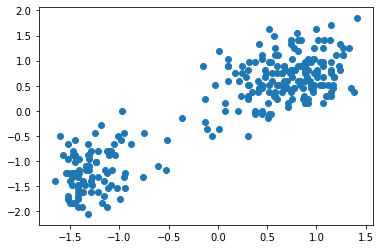

In [19]:
plt.scatter(*data.T)
plt.show()

Initial guess on centroid locations:

In [20]:
centroids = np.random.uniform(-2, 2, 4).reshape((2, 2))

Calculate the Euclidean distance between each point in ```data``` and each point in ```centroids```:

In [21]:
dist = np.hstack([np.linalg.norm(data - centroid, axis=1).reshape(-1, 1) for centroid in centroids])

Get label (index number) of each closest centroid from the ```dist``` array:

In [22]:
np.argmin(dist, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

Put all this together in functional form:

In [23]:
def get_labels(pts, centroids):
    '''Get index number of closest centroid to each item in X

    Parameters
    ----------
    pts : ndarray
        Array of points.
    centroids : ndarray
        Array of centroids.

    Returns
    -------
    res : ndarray
        Indices of closest centroids for each item in X.
    '''
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

Get labels according to current centroids:

In [24]:
labels = get_labels(data, centroids)

Plot predicted classes. Circles show data points distribution, stars show centroids location:

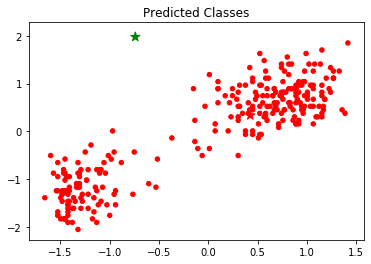

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()

It was only one step in K-Means clustering. In the homework you will be asked to implement iterative procedure of K-Means clustering.

### Read more

[https://www.scipy-lectures.org/intro/numpy/array_object.html](https://www.scipy-lectures.org/intro/numpy/array_object.html)

[https://www.datacamp.com/community/tutorials/python-numpy-tutorial](https://www.datacamp.com/community/tutorials/python-numpy-tutorial)

[https://docs.scipy.org/doc/numpy/user/quickstart.html](https://docs.scipy.org/doc/numpy/user/quickstart.html)

[https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/kmeans.html](https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/kmeans.html)

### Homework

1. Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

1. Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

2. На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

3. Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

4. По заданному двумерному массиву размера NxN постройте словарь, ключи которого - индексы диагоналей, параллельных побочной (нумерация начинается с 0), а значения - списки элементов исходного массива, лежащих на соответствующих диагоналях.
Решите задачу на примере массива a = np.arange(16).reshape(4, 4), в результате должен получиться словарь
{0: [0],
 1: [1, 4],
 2: [2, 5, 8],
 3: [3, 6, 9, 12],
 4: [7, 10, 13],
 5: [11, 14],
 6: [15]}.
 
5. Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать только один цикл while (for).

## Задача 1

In [26]:
matr = np.random.random((10, 3))

close = matr[np.arange(10), np.abs(matr - .5).argmin(axis=1)]

print(matr)
print(close)

[[6.06563247e-02 9.07882116e-01 8.11992275e-01]
 [5.63477356e-01 3.29026578e-01 8.14536758e-01]
 [7.49986507e-01 2.97819714e-01 5.95587703e-01]
 [7.04319019e-01 1.64548118e-01 2.45460365e-01]
 [3.07855016e-01 2.20870434e-01 1.19263831e-01]
 [5.28137300e-01 2.49087727e-01 5.86930815e-02]
 [7.02882725e-01 9.80144246e-01 7.48551532e-01]
 [5.85666630e-01 3.21455993e-04 8.61694546e-01]
 [6.98708923e-01 6.79611362e-01 8.84679380e-03]
 [3.43609747e-01 8.95879428e-01 7.99336183e-02]]
[0.81199227 0.56347736 0.5955877  0.70431902 0.30785502 0.5281373
 0.70288272 0.58566663 0.67961136 0.34360975]


## Задача 2

In [27]:
matr = np.random.random((6, 6))

print(matr)
print(matr.sum(axis=1) / matr.min(axis=0))

[[0.68505504 0.40214872 0.04387162 0.27278396 0.84275359 0.79443049]
 [0.08682025 0.2327763  0.32287114 0.22480297 0.82863947 0.58072096]
 [0.59954608 0.02450962 0.4370915  0.33789676 0.95461486 0.3569699 ]
 [0.63869236 0.48377872 0.93796381 0.99945344 0.03293606 0.6318411 ]
 [0.14718297 0.75907601 0.53306951 0.05104443 0.0043575  0.89287621]
 [0.86652781 0.59403266 0.9117106  0.59984469 0.38604972 0.7420234 ]]
[ 35.02689203  92.88723301  61.78547185  72.96908384 547.93022917
  11.48609138]


## Задача 3

In [28]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

x[np.where(x[:-1] == 0)[0] + 1].max()

5

## Задача 4

In [29]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])

np.add.at(x, i, 1)

print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


## Задача 5

In [30]:
a = np.arange(16).reshape(4, 4)
N = a.shape[0]

diag = {i: [a[j, i - j] for j in range(i + 1) if j < N and i - j < N] for i in range(N * 2 - 1)}

print(a)
print(diag)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


## Задача 6

In [31]:
def get_score(pts, centroids, labels):
    return sum( \
        np.linalg.norm(pts[labels == label] - centroids[label], axis=1).sum() \
            for label in range(centroids.shape[0]) \
    ) / pts.shape[0]


In [32]:
def kmeans(obs, k_or_guess, iter=20, thresh=1e-05):
    if not isinstance(k_or_guess, np.ndarray):
        centroids = np.random.random((k_or_guess, obs.shape[1]))
    else:
        centroids = np.copy(k_or_guess)

    labels = get_labels(obs, centroids)
    score = get_score(obs, centroids, labels)

    best_score = score
    best_centroids = centroids
    while True:
        centroids = np.array([obs[labels == label].mean(axis=0) for label in range(centroids.shape[0])])
        labels = get_labels(obs, centroids)
        old_score = score
        score = get_score(obs, centroids, labels)

        if score < best_score:
            best_score = score
            best_centroids = centroids
        
        if not isinstance(k_or_guess, np.ndarray):
            iter -= 1
            if iter == 0:
                break
        
        if abs(score - old_score) < thresh:
            break

    return best_centroids, best_score

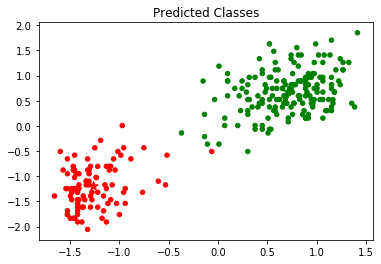

In [33]:
my_centroids, my_score = kmeans(data, 2)
my_labels = get_labels(data, my_centroids)

plt.scatter(*data.T, c=np.where(my_labels, "green", "red"), s=20)
plt.scatter(*my_centroids.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()

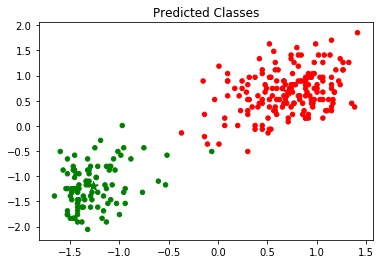

In [34]:
import scipy.cluster

centroids, score = scipy.cluster.vq.kmeans(data, 2)
labels = get_labels(data, centroids)

plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()

In [35]:
np.abs(my_centroids[::-1, :] - centroids).max(), my_score - score

(0.0, -5.551115123125783e-17)